In [2]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime

# read in our data
earthquakes = pd.read_csv("database eq.csv")
landslides = pd.read_csv("catalog.csv")

# set seed for reproducibility
np.random.seed(0)

In [3]:
earthquakes.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [3]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


# Check the data type of our date column

In [4]:
# print the first few rows of the date column
print(landslides['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


In [6]:
# check the data type of our date column
landslides['date'].dtype

dtype('O')

In [7]:
landslides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 23 columns):
id                      1693 non-null int64
date                    1690 non-null object
time                    629 non-null object
continent_code          164 non-null object
country_name            1693 non-null object
country_code            1693 non-null object
state/province          1692 non-null object
population              1693 non-null int64
city/town               1689 non-null object
distance                1692 non-null float64
location_description    551 non-null object
latitude                1692 non-null float64
longitude               1692 non-null float64
geolocation             1692 non-null object
hazard_type             1693 non-null object
landslide_type          1692 non-null object
landslide_size          1692 non-null object
trigger                 1691 non-null object
storm_name              132 non-null object
injuries                515 non-null floa

In [7]:
# Check the data type of the Date column in the earthquakes dataframe
df=pd.read_csv("database eq.csv")
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [10]:
#df['Date'].head()
#convert our date columns to datetime
df['date_parsed']=pd.to_datetime(df['Date'])
df['date_parsed'].head()

0    1965-01-02 00:00:00
1    1965-01-04 00:00:00
2    1965-01-05 00:00:00
3    1965-01-08 00:00:00
4    1965-01-09 00:00:00
Name: date_parsed, dtype: object

In [9]:
day_of_month_df=df['date_parsed'].dt.day

ValueError: Tz-aware datetime.datetime cannot be converted to datetime64 unless utc=True

In [40]:
day_of_month_df.head()
#a=pd.to_datetime(df[DTTM_ALIAS], utc=False, format=timestamp_format)

ValueError: Tz-aware datetime.datetime cannot be converted to datetime64 unless utc=True

# Convert our date columns to datetime

In [8]:
# create a new column, date_parsed, with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format = "%m/%d/%y")

In [9]:
# print the first few rows
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

Now that our dates are parsed correctly, we can interact with them in useful ways.

___
* **What if I run into an error with multiple date formats?** While we're specifying the date format here, sometimes you'll run into an error when there are multiple date formats in a single column. If that happens, you have have pandas try to infer what the right date format should be. You can do that like so:

`landslides['date_parsed'] = pd.to_datetime(landslides['Date'], infer_datetime_format=True)`

* **Why don't you always use `infer_datetime_format = True?`** There are two big reasons not to always have pandas guess the time format. The first is that pandas won't always been able to figure out the correct date format, especially if someone has gotten creative with data entry. The second is that it's much slower than specifying the exact format of the dates.
____

In [ ]:
# Create a new column, date_parsed, in the earthquakes
# dataset that has correctly parsed dates in it. 


# Select just the day of the month from our column

In [10]:
# try to get the day of the month from the date column
day_of_month_landslides = landslides['date'].dt.day

AttributeError: Can only use .dt accessor with datetimelike values

In [11]:
# get the day of the month from the date_parsed column
day_of_month_landslides = landslides['date_parsed'].dt.day
day_of_month_landslides.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

In [ ]:
# Get the day of the month from the date_parsed column in earthquakes


In [ ]:
# Create features for year, month, day, hour, and minute 

# Plot the day of the month to check the date parsing

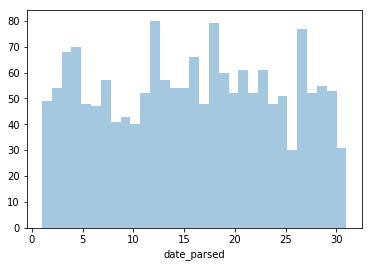

In [12]:
%matplotlib inline
# remove na's
day_of_month_landslides = day_of_month_landslides.dropna()

# plot the day of the month
sns.distplot(day_of_month_landslides, kde=False, bins=31)

In [ ]:
# Plot the days of the month from your
# earthquake dataset and make sure they make sense.

In [13]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link,date_parsed
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html,2007-03-02
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...,2007-03-22
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...,2007-04-06
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...,2007-04-14
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN,2007-04-15


In [14]:
landslides_indexed=landslides.set_index('date_parsed')
landslides_indexed.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
date_parsed,,,,,,,,,,,,,,,,,,,,,
2007-03-02,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
2007-03-22,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2007-04-06,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
2007-04-14,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
2007-04-15,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [15]:
landslides_indexed.resample("M").mean()

,id,population,distance,latitude,longitude,injuries,fatalities
date_parsed,,,,,,,
2007-03-31,38.000000,1.664400e+04,3.371435,39.559200,-79.349350,NaN,NaN
2007-04-30,1284.333333,1.303783e+04,3.005732,40.599167,-82.518200,0.000000,0.000000
2007-05-31,77.000000,4.401180e+05,0.620220,4.808100,-75.694100,NaN,13.000000
2007-06-30,1642.750000,3.501250e+04,10.077980,7.920475,-85.544800,0.000000,0.000000
2007-07-31,121.000000,2.090674e+05,3.733328,29.605220,-87.345400,NaN,7.000000
2007-08-31,188.923077,2.388931e+04,13.271446,30.649692,-89.993638,NaN,4.333333
2007-09-30,244.076923,8.413685e+04,9.401577,25.114977,-94.051862,NaN,2.333333
2007-10-31,318.600000,9.213860e+04,4.340353,15.092807,-78.568027,NaN,12.125000
2007-11-30,355.200000,4.716800e+03,5.050876,19.886480,-83.775000,NaN,36.500000


In [16]:
landslides_indexed.resample("M").mean()['fatalities'].sort_values(ascending=False)[:10]

date_parsed
2007-11-30    36.500000
2008-09-30    26.000000
2008-10-31    20.333333
2008-05-31    13.500000
2007-05-31    13.000000
2007-10-31    12.125000
2015-10-31    12.000000
2008-07-31    11.000000
2013-01-31    10.000000
2008-08-31     8.800000
Name: fatalities, dtype: float64

In [17]:
landslides_indexed.resample("D").sum()['fatalities'].sort_values(ascending=False)[:10]

date_parsed
2015-10-01    280.0
2013-09-16    100.0
2015-05-18     92.0
2010-12-05     91.0
2007-11-01     68.0
2011-11-04     52.0
2010-05-30     52.0
2010-09-04     41.0
2008-08-26     36.0
2011-10-10     32.0
Name: fatalities, dtype: float64

In [18]:
landslides_indexed['2010']

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
date_parsed,,,,,,,,,,,,,,,,,,,,,
2010-01-10,1391,1/10/10,NaN,NaN,Jamaica,JM,Portland,1119,Moore Town,5.02351,...,"(18.116700000000002, -76.45)",Landslide,Landslide,Medium,Downpour,NaN,NaN,0.0,NaN,http://go-jamaica.com/news/read_article.php?id...
2010-01-10,1393,1/10/10,Night,SA,Ecuador,EC,Pichincha,25742,Machachi,26.18676,...,"(-0.41670000000000001, -78.783299999999997)",Landslide,Mudslide,Medium,Rain,NaN,NaN,3.0,NaN,http://www.laht.com/article.asp?ArticleId=3495...
2010-01-21,1431,1/21/10,Morning,NaN,United States,US,California,9277,Valley Center,5.71250,...,"(33.167700000000004, -117.0232)",Landslide,Mudslide,Small,Downpour,NaN,NaN,0.0,NaN,http://www.nbcsandiego.com/news/local-beat/Bra...
2010-01-21,1434,1/21/10,22:00:00,NaN,United States,US,Arizona,1424,Tonto Basin,16.48124,...,"(33.834200000000003, -111.4726)",Landslide,Complex,Small,Downpour,NaN,NaN,0.0,NaN,http://www.paysonroundup.com/news/2010/jan/21/...
2010-01-21,1435,1/21/10,NaN,NaN,United States,US,California,3552,Morongo Valley,1.35292,...,"(34.037300000000002, -116.5898)",Landslide,Debris flow,Small,Downpour,NaN,NaN,0.0,NaN,http://www.kesq.com/Global/story.asp?S=11858325
2010-01-21,1439,1/21/10,17:36:00,NaN,United States,US,California,1128,Aguanga,12.95887,...,"(33.468499999999999, -117.001)",Landslide,Mudslide,Small,Downpour,NaN,NaN,0.0,NaN,http://www.swrnn.com/southwest-riverside/2010-...
2010-01-22,1441,1/22/10,NaN,NaN,United States,US,Arizona,2633,Cordes Lakes,12.98377,...,"(34.193300000000001, -112.1327)",Landslide,Mudslide,Small,Downpour,NaN,NaN,0.0,NaN,http://www.mercurynews.com/breaking-news/ci_14...
2010-01-24,1448,1/24/10,Overnight,NaN,United States,US,North Carolina,2937,Rural Hall,7.54867,...,"(36.296700000000001, -80.246200000000002)",Landslide,Mudslide,Small,Downpour,NaN,NaN,0.0,NaN,http://www.myfox8.com/news/wghp-stokes-county-...
2010-01-24,1449,1/24/10,16:30:00,NaN,United States,US,Tennessee,4577,Madisonville,8.55137,...,"(35.496200000000002, -84.273799999999994)",Landslide,Mudslide,Small,Downpour,NaN,NaN,0.0,NaN,http://www.wbir.com/news/local/story.aspx?stor...


In [19]:
landslides_indexed['2010-03'].head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
date_parsed,,,,,,,,,,,,,,,,,,,,,
2010-03-11,1552,3/11/10,NaN,NaN,Dominica,DM,Saint Paul,702,Pont Cassé,3.98646,...,"(15.335599999999999, -61.331200000000003)",Landslide,Landslide,Medium,Rain,NaN,NaN,0.0,NaN,http://stormcarib.com/reports/current/report.p...
2010-03-11,1555,3/11/10,NaN,NaN,United States,US,Pennsylvania,305704,Pittsburgh,1.29986,...,"(40.431899999999999, -80.006100000000004)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,NaN,http://www.thepittsburghchannel.com/allegheny/...
2010-03-11,1556,3/11/10,Afternoon,NaN,United States,US,Pennsylvania,5951,Crafton,2.37904,...,"(40.432699999999997, -80.038300000000007)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,NaN,http://www.thepittsburghchannel.com/allegheny/...
2010-03-11,1557,3/11/10,18:15:00,NaN,United States,US,Wisconsin,2133,Saint Croix Falls,3.90084,...,"(45.385300000000001, -92.6751)",Landslide,Mudslide,Small,Downpour,NaN,NaN,0.0,NaN,http://www.startribune.com/local/87416017.html...
2010-03-12,1562,3/12/10,NaN,NaN,United States,US,West Virginia,1260,Belle,0.02907,...,"(38.232300000000002, -81.537700000000001)",Landslide,Mudslide,Medium,Downpour,NaN,NaN,0.0,NaN,http://www.accuweather.com/blogs/news/story/26...


In [20]:
landslides_indexed['2010-10-01':'2010-10-20']

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
date_parsed,,,,,,,,,,,,,,,,,,,,,
2010-10-01,2526,10/1/10,NaN,NaN,Costa Rica,CR,San José,2833,Salitral,0.25254,...,"(9.9108000000000001, -84.176400000000001)",Landslide,Landslide,Medium,Downpour,NaN,NaN,0.0,NaN,http://www.ticotimes.net/News/Mudslides-Force-...
2010-10-01,2527,10/1/10,NaN,NaN,Costa Rica,CR,San José,2833,Salitral,0.25254,...,"(9.9108000000000001, -84.176199999999994)",Landslide,Landslide,Medium,Downpour,NaN,NaN,0.0,Tico Times,http://www.ticotimes.net/News/Rains-Cause-Wide...
2010-10-01,2528,10/1/10,NaN,NaN,Haiti,HT,Ouest,442156,Carrefour,12.13199,...,"(18.4468, -72.457700000000003)",Landslide,Mudslide,Medium,Downpour,NaN,NaN,3.0,NaN,http://www.presstv.ir/detail/144854.html
2010-10-01,2529,10/1/10,9:30:00,NaN,United States,US,New Hampshire,1126,Woodsville,5.48538,...,"(44.147300000000001, -71.969099999999997)",Landslide,Mudslide,Small,Downpour,NaN,NaN,0.0,NaN,http://www.wmur.com/weather/25237221/detail.html
2010-10-01,2530,10/1/10,Afternoon,NaN,United States,US,Maryland,10519,Chesapeake Ranch Estates,2.52659,...,"(38.355800000000002, -76.391499999999994)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,NaN,http://www.washingtonpost.com/wp-dyn/content/a...
2010-10-03,2533,10/3/10,13:00,NaN,Honduras,HN,Comayagua,1484,El Rancho,4.53362,...,"(14.389799999999999, -87.7654)",Landslide,Mudslide,Medium,Rain,NaN,NaN,0.0,Honduras News,http://www.hondurasnews.com/2010/10/03/landsli...
2010-10-04,2543,10/4/10,NaN,NaN,Saint Vincent and the Grenadines,VC,Charlotte,1680,Georgetown,6.34851,...,"(13.260899999999999, -61.181899999999999)",Landslide,Landslide,Medium,Downpour,NaN,NaN,0.0,NaN,http://www.antiguaobserver.com/?p=44290
2010-10-05,2547,10/5/10,NaN,NaN,Dominica,DM,Saint Andrew,1020,Calibishie,2.64873,...,"(15.591799999999999, -61.373100000000001)",Landslide,Landslide,Medium,Rain,NaN,NaN,0.0,NaN,http://dominicanewsonline.com/dno/news-photo-l...
2010-10-06,2550,10/6/10,NaN,NaN,Puerto Rico,PR,Orocovis,944,Orocovis,6.85760,...,"(18.165199999999999, -66.396900000000002)",Landslide,Complex,Medium,Tropical cyclone,Tropical Storm Otto,NaN,0.0,NaN,http://www.whitehouse.gov/the-press-office/201...
